# Hotel Booking Cancellation Prediction

### Background:
Hotel booking cancellations can have a significant impact on revenue and operations. Accurately predicting these cancellations can aid in better resource management, financial planning, and guest relations. Here are the specific reasons why predicting hotel booking cancellation is important.

1. **Revenue Optimization**: Predicting cancellations allows hotels to better manage room inventory, potentially overbooking rooms to ensure maximum occupancy and implementing dynamic pricing.

2. **Operational Efficiency**: Accurate cancellation predictions aid in resource allocation, such as staffing and procurement, ensuring that costs are minimized and resources aren't wasted on bookings that won't materialize.

3. **Guest Experience**: By managing overbookings effectively through accurate predictions, hotels can minimize guest inconvenience, enhancing the overall guest experience.

4. **Strategic Marketing**: Insights from cancellation trends can guide targeted marketing campaigns or loyalty programs to reduce future cancellations.

5. **Financial Forecasting**: Understanding expected cancellations helps in more accurate financial planning and budgeting.


### Goal:
This project aims to predict hotel booking cancellations by leveraging machine learning algorithms. The classification models used include Logistic Regression, Decision Trees, Random Forest, and XGBoost. The goal is to compare their performances and determine which one is superior, thereby informing future strategies for running the hotel business.


### Dataset source: 
https://www.kaggle.com/datasets/mojtaba142/hotel-booking



### Table of Contents:

1. **Import libraries & Read Dataset**

2. **Data Exploration and Understanding**
    - Dataset Overview
    - Data Visualization
    - Statistical Analysis
    
3. **Data Cleaning**
    - Handling Missing Values
    - Addressing Data types
    - Handling Outliers
    - Handling Duplicates
    
    
4. **Exploratory Data Analysis(EDA)**
    - Target Variable Distribution
    - Numerical Variable Distribution
    - Categorical Variable Counts
    - Correlation Heatmap
    - Relation between Numerical Variables and Target
    - Relation between Categorical Variables and Target
    - Geographical Distribution

5. **Data Pre-processing**
    - Feature Selection & Engineering
    - Encoding Categorical features.
    - Data Splitting
    
6. **Model Development & Training**
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - SVC
    - Xgboost



8. **Model Evaluation**
 
9. **Feature Importances(XGBoost)**

9. **Conclusion**





## 1. Import libraries & Read Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
hotel_data = pd.read_csv('hotel_booking.csv')

## 2. Data Exploration and Understanding

In [3]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- The following below is the description of variables
- **Target variable**: `is_cancelled`

| Index | Variable                      | Description                                                      |
|-------|-------------------------------|------------------------------------------------------------------|
| 1     | hotel                         | Type of hotel (Resort Hotel, City Hotel)                          |
| 2     | is_canceled                   | Reservation cancellation status (0 = not canceled, 1 = canceled)  |
| 3     | lead_time                     | Number of days between booking and arrival                        |
| 4     | arrival_date_year             | Year of arrival                                                   |
| 5     | arrival_date_month            | Month of arrival                                                  |
| 6     | arrival_date_week_number      | Week number of the year for arrival                               |
| 7     | arrival_date_day_of_month     | Day of the month of arrival                                       |
| 8     | stays_in_weekend_nights       | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9     | stays_in_week_nights          | Number of week nights the guest stayed or booked                  |
| 10    | adults                        | Number of adults                                                  |
| 11    | children                      | Number of children                                                |
| 12    | babies                        | Number of babies                                                  |
| 13    | meal                          | Type of meal booked (BB, FB, HB, SC, Undefined)                   |
| 14    | country                       | Country of origin of the guest                                    |
| 15    | market_segment                | Market segment designation                                        |
| 16    | distribution_channel          | Booking distribution channel                                      |
| 17    | is_repeated_guest             | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18    | previous_cancellations        | Number of previous bookings that were canceled by the customer    |
| 19    | previous_bookings_not_canceled| Number of previous bookings that were not canceled by the customer|
| 20    | reserved_room_type            | Type of reserved room                                             |
| 21    | assigned_room_type            | Type of assigned room                                             |
| 22    | booking_changes               | Number of changes made to the booking                             |
| 23    | deposit_type                  | Type of deposit made (No Deposit, Refundable, Non Refund)         |
| 24    | agent                         | ID of the travel agent responsible for the booking                |
| 25    | company                       | ID of the company responsible for the booking                     |
| 26    | days_in_waiting_list          | Number of days the booking was in the waiting list                |
| 27    | customer_type                 | Type of customer (Transient, Contract, Transient-Party, Group)    |
| 28    | adr                           | Average Daily Rate                                                |
| 29    | required_car_parking_spaces   | Number of car parking spaces required                             |
| 30    | total_of_special_requests     | Number of special requests made                                   |
| 31    | reservation_status            | Last reservation status (Check-Out, Canceled, No-Show)            |
| 32    | reservation_status_date       | Date of the last reservation status                               |
| 33    | name                          | Guest's name                                                      |
| 34    | email                         | Guest's email address                                             |
| 35    | phone-number                  | Guest's phone number                                              |
| 36    | credit_card                   | Last four digits of the guest's credit card                       |

In [4]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Observations:

- **'lead_time'** has a mean of approximately 104 days with a standard deviation of about 107 days.
- The **'adults'** column has a mean of approximately 1.86, indicating that most bookings are made for around 2 adults.
- **'previous_cancellations'** and previous_bookings_not_canceled have means of 0.087 and 0.137 respectively, indicating that most bookings have no previous cancellations or non-canceled bookings.
- The **'adr'** (Average Daily Rate) column has a mean of approximately 101.83 and a large standard deviation of approximately 50.54, indicating variability in daily rates.
- **'required_car_parking_spaces'** and **'total_of_special_requests'** have means of 0.063 and 0.571 respectively.

- There are some missing values in the columns children, country, agent, and company that we need to address during data cleaning.
- Some columns like agent and company have a substantial amount of missing data.
- It might be useful to explore the distribution of cancellations (is_canceled) to understand the class distribution in our target variable.

## 3. Data Cleaning

### Handling Missing Values

In [6]:
missing_values_info = hotel_data.isnull().sum()
missing_values_info

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
high_missing_values = missing_values_info[missing_values_info > 0.2 * len(hotel_data)]
high_missing_values

company    112593
dtype: int64

### Observations:
- children: 4 missing entries
- country: 488 missing entries
- agent: 16,340 missing entries
- company: 112,593 missing entries

### Strategy:
- children: Impute with mode.
- country: Impute with mode.
- agent: Impute with mode.
- company: Drop the column


In [8]:

hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)

hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)


hotel_data['agent'].fillna(hotel_data['agent'].mode()[0], inplace=True)


hotel_data.drop('company', axis=1, inplace=True)


missing_values_after_cleaning = hotel_data.isnull().sum()



### Handling Outliers

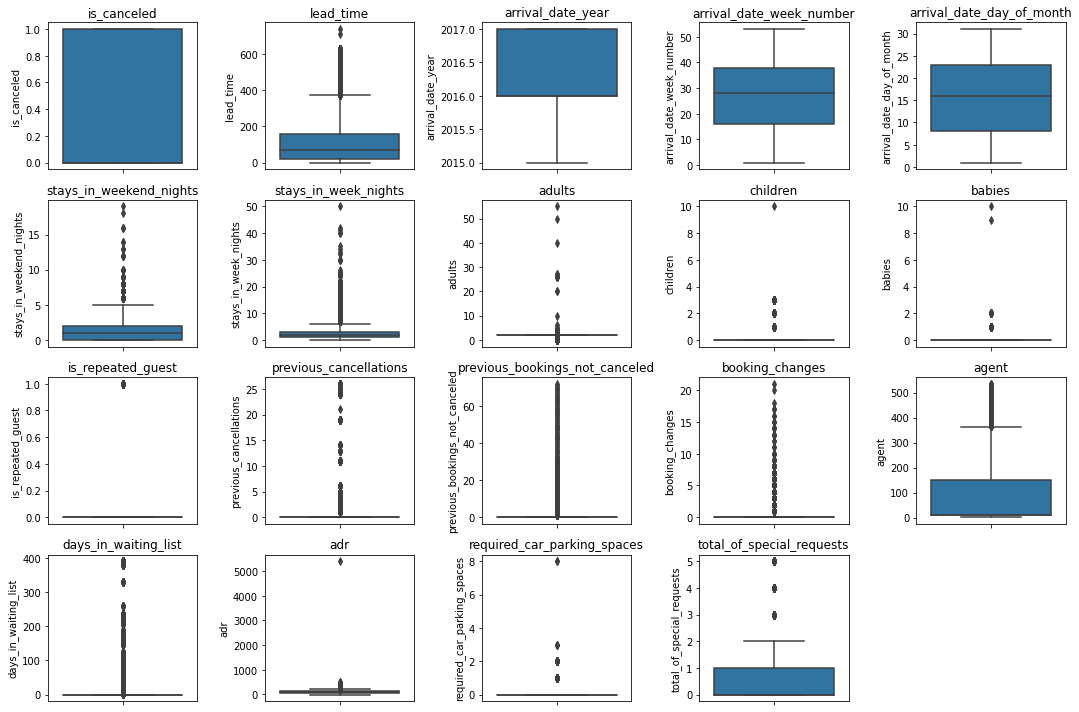

In [9]:

numerical_columns = hotel_data.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=hotel_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

### Observations:

- **Lead Time**: Extremely long lead times might be accurate but could disproportionately affect our model.
- **Stays**: Unusually long stays may be legitimate but are not the norm.
- **Previous Cancellations/Bookings**: High numbers in these fields may be possible but could indicate erroneous data entry.
- **Days in Waiting List**: Extremely high values might need verification for accuracy.
- **ADR (Average Daily Rate)**: Extremely high or low values might be errors or special cases (e.g., luxury suites).


### Strategy:

- **Cap/Floor Method**: Replace outlier values with a maximum/minimum allowable value.
    - Identify the 1st and 99th percentiles for each numerical variable.
    - Cap values above the 99th percentile to the value at the 99th percentile.
    - Floor values below the 1st percentile to the value at the 1st percentile.

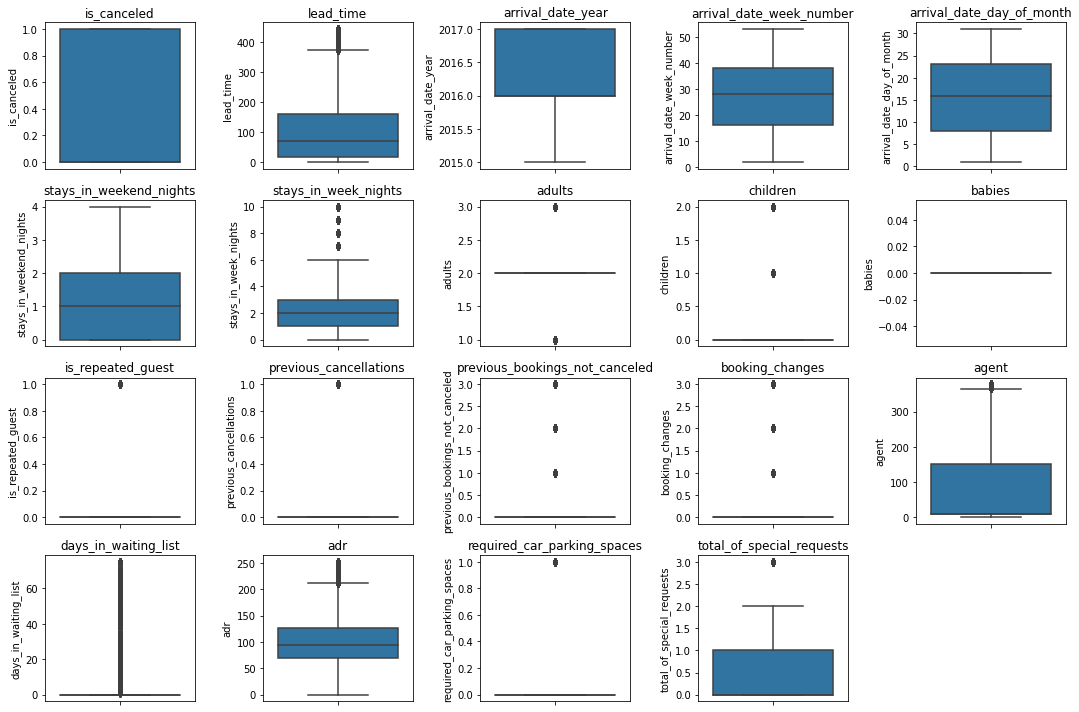

In [10]:

percentiles_1 = hotel_data[numerical_columns].quantile(0.01)
percentiles_99 = hotel_data[numerical_columns].quantile(0.99)


hotel_data_capped = hotel_data.copy()
hotel_data_capped[numerical_columns] = hotel_data[numerical_columns].clip(lower=percentiles_1, upper=percentiles_99, axis=1)


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=hotel_data_capped[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


### Addressing Data Types

In [11]:
hotel_data_capped.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Observations and Actions:
- **Date Columns**: reservation_status_date should be converted to a datetime type for accurate temporal analysis.
- **Categorical Variables**: Variables like hotel, country, market_segment, etc., are categorical and may need encoding before modeling.
- **Email, Phone Number, and Credit Card**: These might be sensitive information and unless they are crucial for analysis, it might be ethical to drop these columns to respect privacy.

In [12]:

hotel_data_cleaned = hotel_data_capped.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)


### Handling Duplicates

In [13]:
hotel_data_cleaned.duplicated().sum()

32080

In [14]:
hotel_data_no_duplicates = hotel_data_cleaned.drop_duplicates(keep='first')

In [15]:
hotel_data_no_duplicates.duplicated().sum()

0

In [16]:
hotel_data_no_duplicates['total_rate'] = hotel_data_no_duplicates['adr'] * (hotel_data_no_duplicates['stays_in_week_nights'] + hotel_data_no_duplicates['stays_in_weekend_nights'])
hotel_data_no_duplicates['total_stay_nights']  = (hotel_data_no_duplicates['stays_in_week_nights'] + hotel_data_no_duplicates['stays_in_weekend_nights'])
hotel_data_no_duplicates['total_guests']  = hotel_data_no_duplicates['adults'] + hotel_data_no_duplicates['children'] + hotel_data_no_duplicates['babies']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [17]:
def categorize_guest_group(row):
    if row['adults'] == 1 and row['babies'] == 0 and row['children'] == 0:
        return 'Solo'
    elif row['adults'] == 2 and row['babies'] == 0 and row['children'] == 0:
        return 'Couples'
    elif row['adults'] > 2 or (row['adults'] == 2 and (row['children'] > 0 or row['babies'] > 0)):
        return 'Family'
    else:
        return 'Other'

hotel_data_no_duplicates['guest_group_type'] = hotel_data_no_duplicates.apply(categorize_guest_group, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# 4. Exploratory Data Analysis (EDA)

### Target Variable Distribution

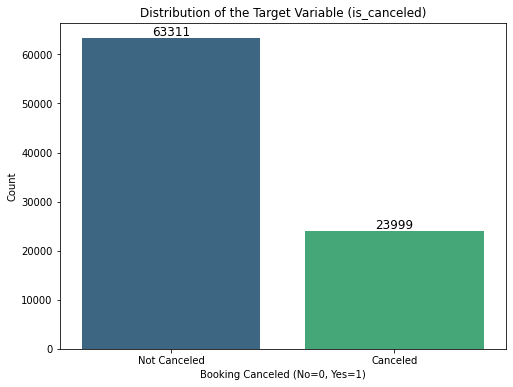

(None, 0    63311
 1    23999
 Name: is_canceled, dtype: int64)

In [18]:

cancel_counts = hotel_data_no_duplicates['is_canceled'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=cancel_counts.index, y=cancel_counts.values, palette="viridis")
plt.title('Distribution of the Target Variable (is_canceled)')
plt.xlabel('Booking Canceled (No=0, Yes=1)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Not Canceled', 'Canceled'])


for i, count in enumerate(cancel_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show(), cancel_counts


### Observations:

The distribution of the target variable is_canceled is as follows:

- **Not Canceled (0)**: 63,331 instances
- **Canceled (1)**: 24,000 instances

This indicates a somewhat imbalanced dataset, with more instances of non-cancellations than cancellations. This is important to keep in mind during model training, as we might want to use techniques to handle imbalanced data to ensure that the model doesn't become biased towards the majority class.

### Numerical Variable Distributions

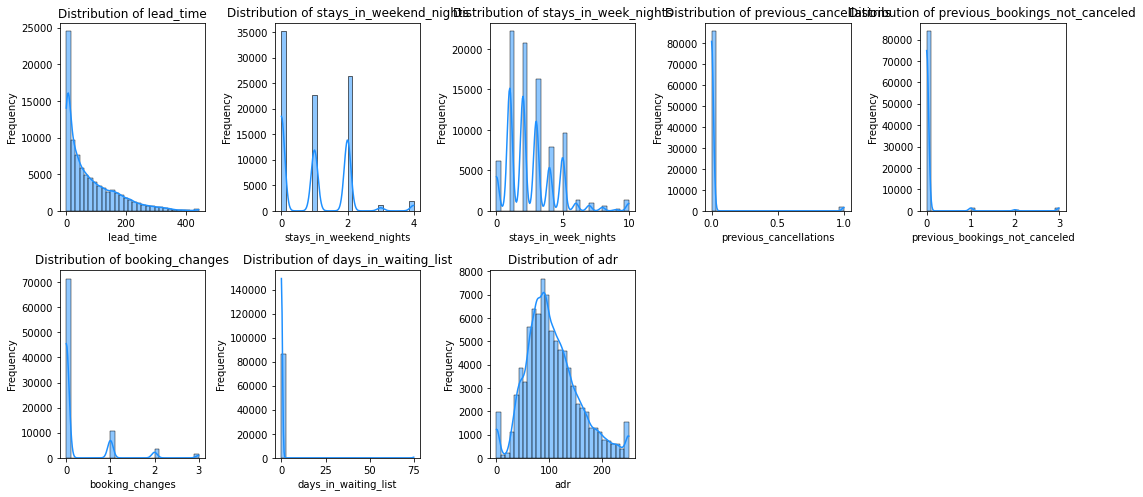

In [19]:

selected_numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
     'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'adr'
]


plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(hotel_data_no_duplicates[col], bins=30, kde=True, color="dodgerblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

The histograms provide insights into the distributions of selected numerical variables:

- **Lead Time**: Most bookings are made with a short lead time, although there are several made with a longer lead time.

- **Stays (Weekend & Week Nights)**: Most stays are quite short, with a mode of 0 for weekend nights and 2 for week nights.

- **Adults, Children, Babies**: The majority of bookings are made for 1 or 2 adults, with children and babies being less common.

- **Previous Cancellations & Bookings Not Canceled**: Most values are 0, indicating that for most bookings, the customer did not have previous cancellations or non-canceled bookings.

- **Booking Changes**: Most bookings were not modified after being set.

- **Days in Waiting List**: Most bookings did not spend time on a waiting list.

- **ADR (Average Daily Rate)**: ADR is somewhat normally distributed, but with a positive skew.

### Categorical Variable Counts

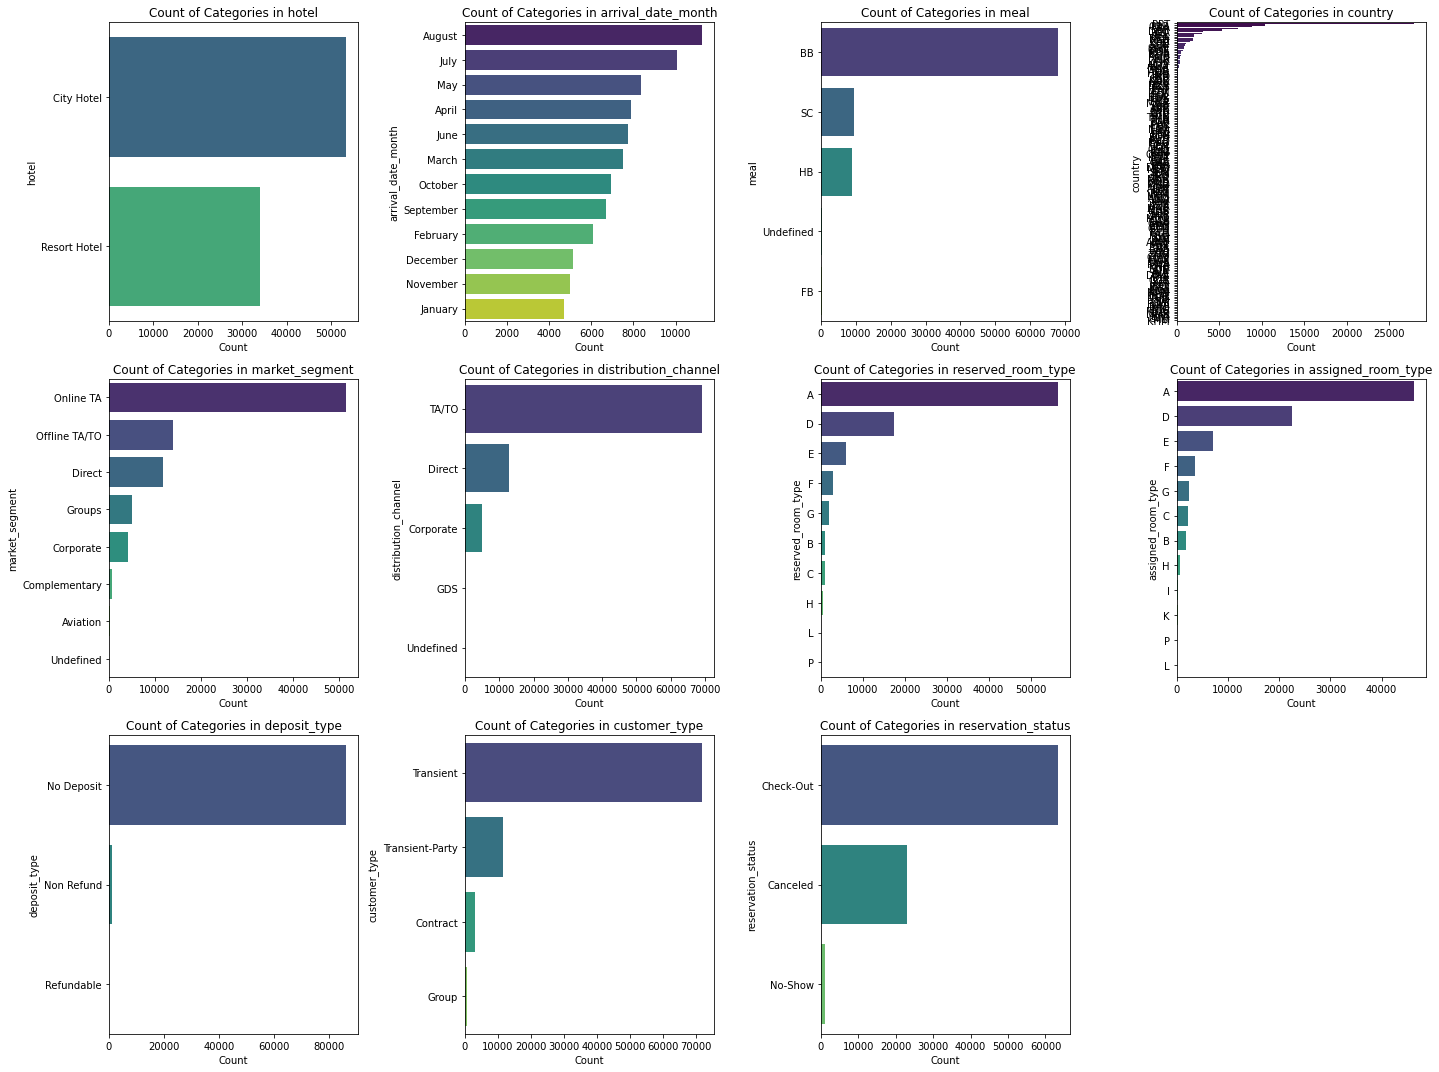

In [20]:
selected_categorical_columns = [
    'hotel','arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type','reservation_status'
]


plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(y=hotel_data_no_duplicates[col], order=hotel_data_no_duplicates[col].value_counts().index, palette="viridis")
    plt.title(f'Count of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

The visualizations provide insights into the categorical variables:

- **Hotel**: There are more bookings for city hotels than resort hotels.
- **Arrival Date Month**: Most bookings are made for the summer months, with August being the peak.
- **Meal**: The majority of bookings do not include a meal (SC - no meal package).
- **Country**: Most guests are from Portugal (PRT), with other countries having significantly fewer bookings.
- **Market Segment**: Online Travel Agents (TA) and Offline Travel Agents constitute the majority of the market segments.
- **Distribution Channel**: Travel agents and tour operators are the dominant distribution channels.
- **Reserved & Assigned Room Type**: The majority of rooms are type ‘A’.
- **Deposit Type**: The majority of bookings do not require a deposit.
- **Customer Type**: Most customers are transient (not part of a group or contract).

### Correlation Heatmap

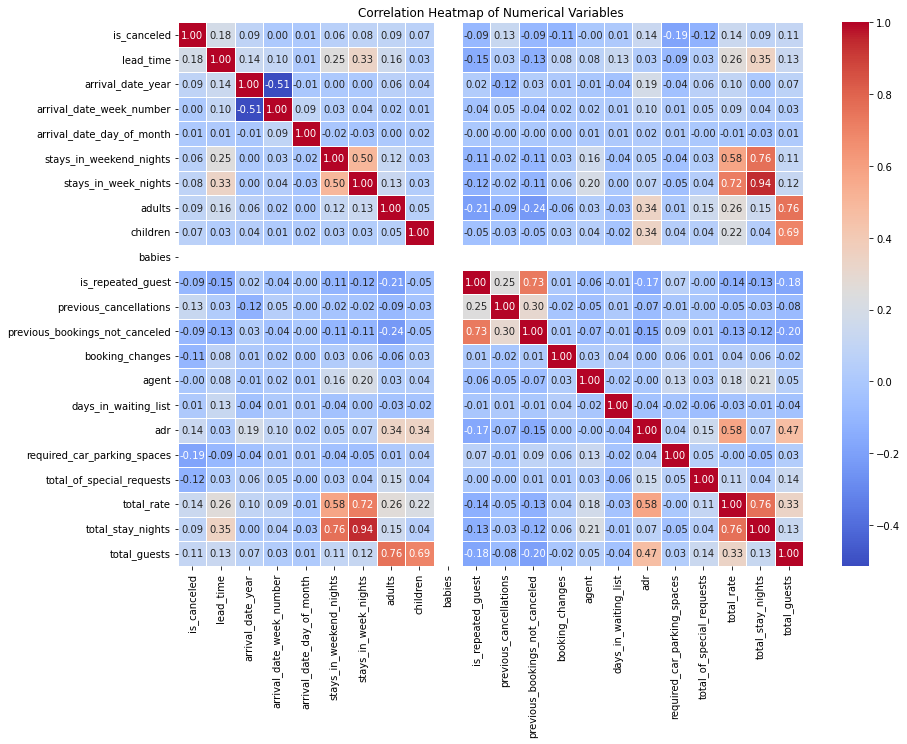

In [21]:
numerical_columns = hotel_data_no_duplicates.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = hotel_data_no_duplicates[numerical_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The heatmap provides a visual representation of the correlation between numerical variables:

- **Lead Time & Other Variables**: **lead_time** shows some correlation with **is_canceled (0.25)**, suggesting that bookings made well in advance are slightly more likely to be canceled.

- **Stays (Weekend & Week Nights) & Other Variables**: **stays_in_weekend_nights** and **stays_in_week_nights** are somewhat correlated (0.51), which is intuitive as longer stays might include both week and weekend nights.

- **Previous Cancellations & Other Variables**: previous_cancellations shows a moderate correlation with **is_repeated_guest** (-0.11) and **previous_bookings_not_canceled** (-0.57).

- **ADR & Other Variables**: **adr** (Average Daily Rate) does not show very high correlation with other variables.

- No pairs of variables are highly correlated (e.g., correlation > 0.8), which is good as it means multicollinearity is likely not an issue.

## Temporal Trends

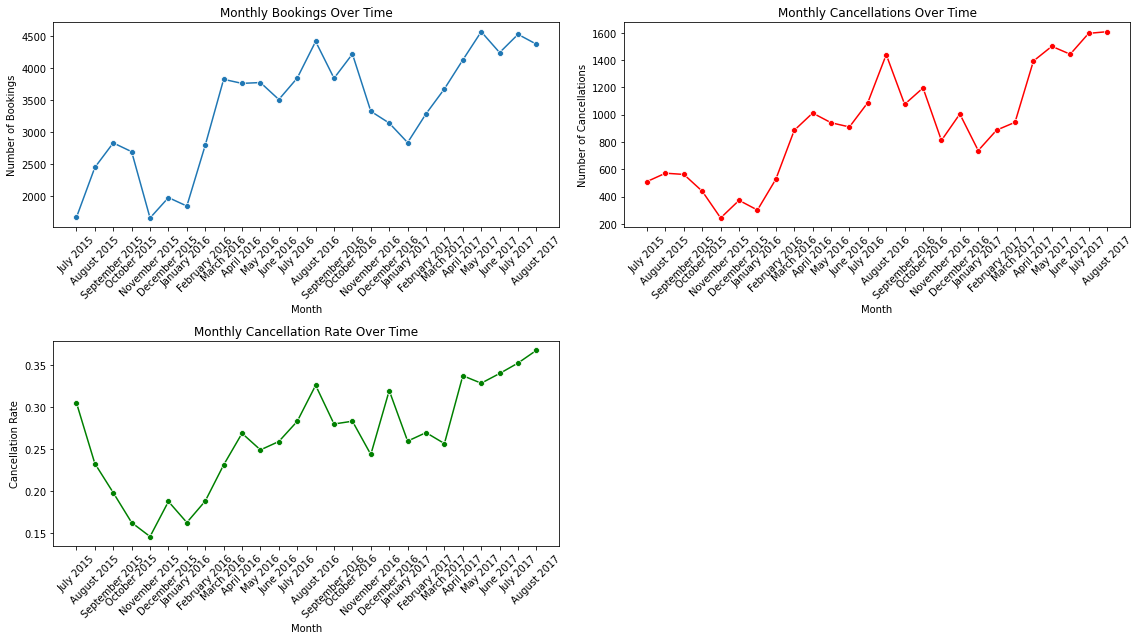

In [22]:

monthly_data = hotel_data_no_duplicates.groupby(['arrival_date_year', 'arrival_date_month']).agg({
    'is_canceled': ['count', 'sum'],
#     'total_rate': 'sum',
    'adr': 'mean' 
}).reset_index()


monthly_data.columns = ['_'.join(col).rstrip('_') for col in monthly_data.columns.values]


monthly_data['month_year'] = monthly_data['arrival_date_month'] + ' ' + monthly_data['arrival_date_year'].astype(str)


months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['arrival_date_month'] = pd.Categorical(monthly_data['arrival_date_month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values(['arrival_date_year', 'arrival_date_month'])


monthly_data['cancel_rate'] = monthly_data['is_canceled_sum'] / monthly_data['is_canceled_count']

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
sns.lineplot(x='month_year', y='is_canceled_count', data=monthly_data, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.subplot(2, 2, 2)
sns.lineplot(x='month_year', y='is_canceled_sum', data=monthly_data, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Monthly Cancellations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

plt.subplot(2, 2, 3)
sns.lineplot(x='month_year', y='cancel_rate', data=monthly_data, marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Cancellation Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')

# plt.subplot(2, 2, 4)
# sns.lineplot(x='month_year', y='total_rate_sum', data=monthly_data, marker='o', color='green')
# plt.xticks(rotation=45)
# plt.title('Total Monthly Revenue Over Time')
# plt.xlabel('Month')
# plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [23]:

# sns.lineplot(x='month_year', y='adr_mean', data=monthly_data, marker='o', color='green')
# plt.xticks(rotation=45)
# plt.title('Average Monthly ADR Over Time')
# plt.xlabel('Month')
# plt.ylabel('ADR')

# plt.tight_layout()
# plt.show()

- **Monthly Bookings Over Time**: We observe noticeable seasonality in the bookings data, with peaks during the summer months (July and August) and troughs during the winter.

- **Monthly Cancellations Over Time**: Similar to the bookings, cancellations also peak during the summer months, likely due to the higher overall volume of bookings during this period.

- There's a clear seasonal pattern in both bookings and cancellations, with both peaking during the summer months.


### Relation between Numerical Variables and Target:

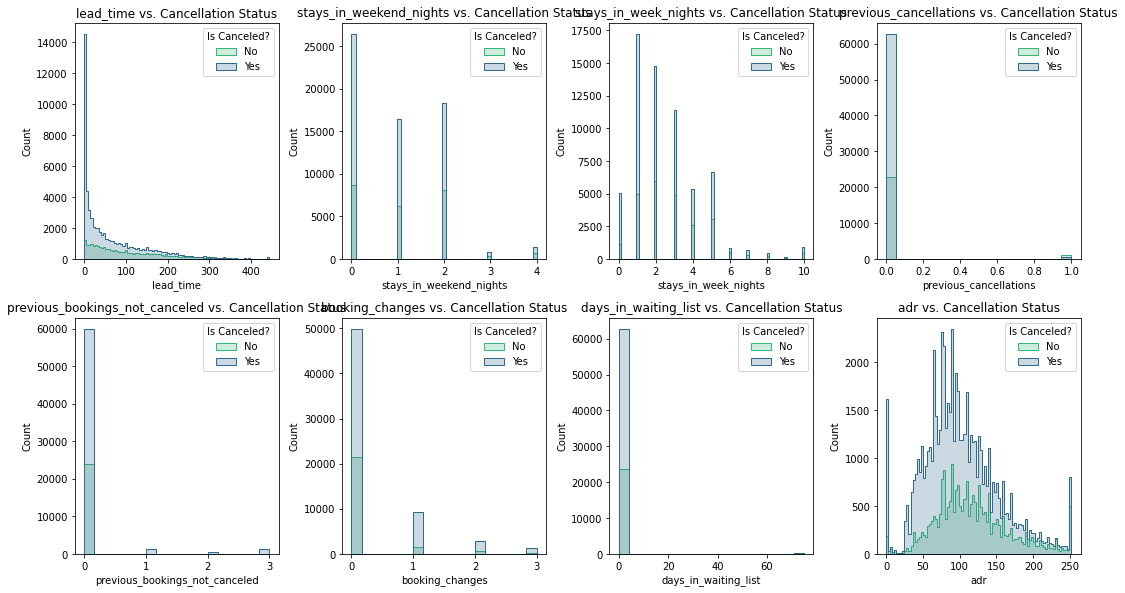

In [24]:
selected_numerical_columns_subset = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
     'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'adr'
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_numerical_columns_subset, 1):
    plt.subplot(3, 4, i)
    sns.histplot(x=col, hue='is_canceled', data=hotel_data_no_duplicates, palette='viridis', kde=False, element='step', stat='count', common_norm=False)
    plt.title(f'{col} vs. Cancellation Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Is Canceled?', labels=['No', 'Yes'])
    plt.tight_layout()

plt.show()


The boxplots depict the distribution of selected numerical variables against the cancellation status:

- **Lead Time**: Higher lead times tend to be associated with more cancellations.

- **Stays (Weekend & Week Nights)**: There doesn’t seem to be a clear pattern between the length of stay and cancellations.

- **Adults & Children**: No clear distinction in the distribution between canceled and non-canceled bookings.

- **Previous Cancellations**: A higher number of previous cancellations appears to be associated with a higher likelihood of cancellation.

- **Previous Bookings Not Canceled**: The distributions seem quite similar for both canceled and not canceled bookings.

- **Booking Changes**: Most bookings, whether canceled or not, are not altered once made.

- **Days in Waiting List**: Most bookings do not spend days in the waiting list, and it doesn't show a clear pattern with cancellations.

- **ADR (Average Daily Rate)**: Higher ADR seems slightly associated with fewer cancellations.

- Some variables like **lead_time** and **previous_cancellations** might be useful predictors for cancellations, while others like **stays_in_week_nights** and **adults** might be less useful given their similar distributions across both classes.

### Relation between Categorical Variables and Target

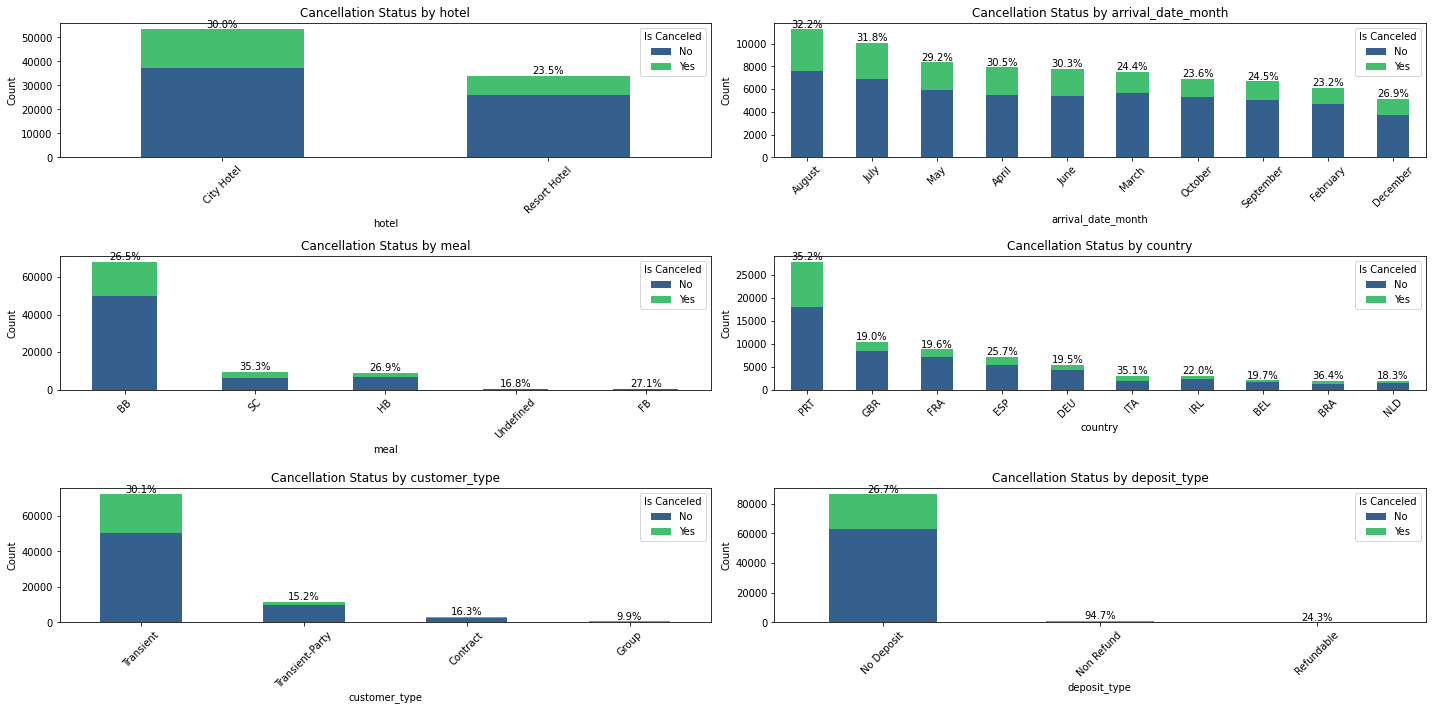

In [25]:

selected_categorical_columns_subset = ['hotel', 'arrival_date_month', 'meal', 'country', 'customer_type','deposit_type']


cmap = plt.get_cmap("viridis")

colors = [cmap(0.3), cmap(0.7)]  

plt.figure(figsize=(20, 25))
for i, col in enumerate(selected_categorical_columns_subset, 1):
    category_counts = hotel_data_no_duplicates.groupby([col, 'is_canceled']).size().unstack(fill_value=0)
    category_counts['total'] = category_counts[0] + category_counts[1]
    category_counts = category_counts.sort_values('total', ascending=False).head(10)
    
    plt.subplot(8, 2, i)
    category_counts[[0, 1]].plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
    plt.title(f'Cancellation Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Canceled', labels=['No', 'Yes'])

    for idx, value in enumerate(category_counts.index):
        plt.text(idx, category_counts.loc[value, 'total'], f"{100 * category_counts.loc[value, 1] / category_counts.loc[value, 'total']:.1f}%", ha='center', va='bottom')

    plt.tight_layout()

plt.show()

The stacked bar charts visualize the cancellation rates across different categories:

- **Hotel**: Both city and resort hotels have cancellations, but city hotels have a higher absolute number, potentially due to higher overall booking volume.

- **Arrival Date Month**: July and August have the highest total bookings and cancellations, aligning with the observed peak season.

- **Meal**: The "SC" (no meal) category shows a high absolute number of cancellations, potentially due to its high overall frequency.

- **Country**: Guests from Portugal (PRT) show the highest absolute number of cancellations, but this might be due to them being the most frequent guests. Interesting variations in cancellation percentages are observable in different countries.

- **Customer Type**: Transient and Transient-Party customers show higher absolute cancellations compared to other customer types.

- While higher bars indicate more total bookings, the percentage within the bars indicates the proportion of those bookings that were canceled.

- Considering both the absolute numbers and percentages is crucial to understanding the impact and significance of each category on cancellations.

### Geographical Distribution

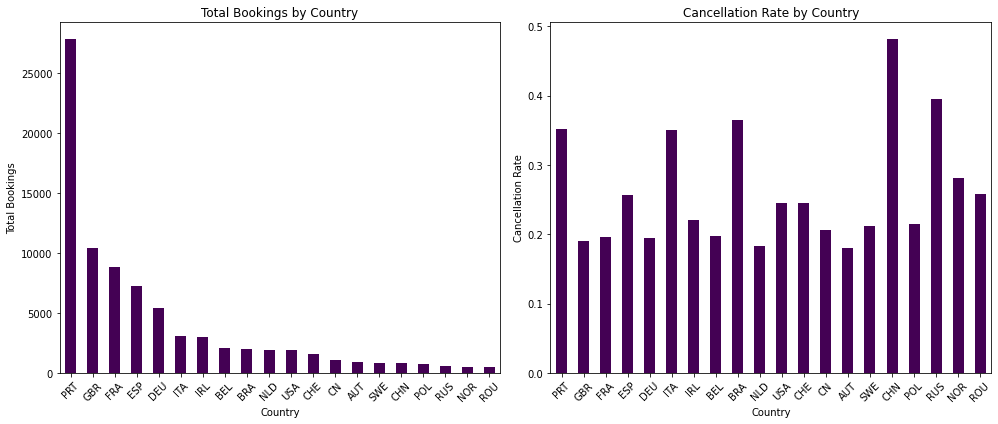

In [26]:

country_data = hotel_data_no_duplicates.groupby(['country', 'is_canceled']).size().unstack(fill_value=0)
country_data['total'] = country_data[0] + country_data[1]


top_countries_data = country_data.sort_values('total', ascending=False).head(20)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
top_countries_data['total'].plot(kind='bar', ax=plt.gca(), colormap="viridis")
plt.title('Total Bookings by Country')
plt.xlabel('Country')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
(top_countries_data[1] / top_countries_data['total']).plot(kind='bar', ax=plt.gca(), colormap="viridis")
plt.title('Cancellation Rate by Country')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The visualizations provide insights into the geographical aspects of bookings and cancellations:

- **Total Bookings by Country**: The left chart displays the total bookings for the top 20 countries. Portugal (PRT) has the highest number of bookings, followed by other countries such as the United Kingdom (GBR) and France (FRA).

- **Cancellation Rate by Country**: The right chart displays the cancellation rate for the top 20 countries. Some countries exhibit higher cancellation rates than others. For instance, Italy (ITA) and Portugal (PRT) show notably higher cancellation rates compared to others.

While some countries have high booking volumes, their cancellation rates vary, suggesting that guests from different countries may exhibit different booking and cancellation behaviors.

## 5. Data Pre-processing

### Feature Selection and Engineering

Feature selection and engineering are crucial steps in the machine learning (ML) pipeline because they significantly impact the performance, interpretability, and efficiency of ML models. 


We will eliminate the following columns, as they do not seem to be pertinent or directly impact booking cancellations:

- **assigned_room_type**: This feature indicates the rooms genuinely assigned to guests upon check-in. Given that the project aims to explore the primary factors behind cancellations, it's justifiable to omit this feature.
- **agent**:  This feature has an extensive range of variables, which could potentially lead to model overfitting.
- **country**: While certain countries might exhibit a higher cancellation tendency, the numerous variables within this feature could also result in overfitting.
- **reservation_status**: Given that values like 'Canceled', 'Check-Out', and 'No-Show' inherently imply cancellation status, this feature is redundant.
- **reservation_status_date**: Since the arrival date is already provided, this feature is redundant.

In [27]:
hotel_data_no_duplicates.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_rate',
       'total_stay_nights', 'total_guests', 'guest_group_type'],
      dtype='object')

In [28]:
# Since the country is too a lot we will add extrac column guest_origin if the guests are local(i.e. PRT) or foreing
hotel_data_no_duplicates['guest_origin'] = hotel_data_no_duplicates['country'].apply(lambda x: 'Local' if x == 'PRT' else 'Foreign')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# #remove multicolierrity 
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['stays_in_weekend_nights'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['stays_in_week_nights'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['adults'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['children'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['babies'], axis=1)

In [30]:
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['assigned_room_type'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['agent'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['country'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['reservation_status_date'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['reservation_status'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['arrival_date_week_number'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['distribution_channel'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['customer_type'], axis=1)

This project aims to address the business question: "What prompts foreign guests at the City Hotel to cancel their bookings?" To this end, we will filter the dataset to focus solely on the City Hotel and foreign guests, and then train the data accordingly.

In [31]:
hotel_data_no_duplicates = hotel_data_no_duplicates[hotel_data_no_duplicates['hotel'] == 'City Hotel']

hotel_data_no_duplicates = hotel_data_no_duplicates[hotel_data_no_duplicates['guest_origin'] == 'Foreign']





In [32]:
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['hotel'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['guest_origin'], axis=1)

In [33]:
hotel_data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40190 entries, 40145 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     40190 non-null  int64  
 1   lead_time                       40190 non-null  int64  
 2   arrival_date_year               40190 non-null  int64  
 3   arrival_date_month              40190 non-null  object 
 4   arrival_date_day_of_month       40190 non-null  int64  
 5   meal                            40190 non-null  object 
 6   market_segment                  40190 non-null  object 
 7   is_repeated_guest               40190 non-null  int64  
 8   previous_cancellations          40190 non-null  int64  
 9   previous_bookings_not_canceled  40190 non-null  int64  
 10  reserved_room_type              40190 non-null  object 
 11  booking_changes                 40190 non-null  int64  
 12  deposit_type               

## Encoding Categorical Variables

In [34]:
one_hot_encode_vars = ['meal', 'market_segment',
                        'reserved_room_type',
                        'deposit_type','guest_group_type']

hotel_data_encoded = pd.get_dummies(hotel_data_no_duplicates, columns=one_hot_encode_vars, drop_first=True)

In [35]:

ordinal_mappings = {
    'arrival_date_month': {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    
}

hotel_data_encoded_ordinal = hotel_data_encoded.replace(ordinal_mappings)

In [36]:

hotel_data_encoded_ordinal.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_rate                        float64
total_stay_nights                   int64
total_guests                      float64
meal_FB                             uint8
meal_HB                             uint8
meal_SC                             uint8
market_segment_Complementary        uint8
market_segment_Corporate            uint8
market_segment_Direct               uint8
market_segment_Groups               uint8
market_segment_Offline TA/TO      

In [37]:
hotel_data_encoded_ordinal['is_canceled'].value_counts()

0    29035
1    11155
Name: is_canceled, dtype: int64

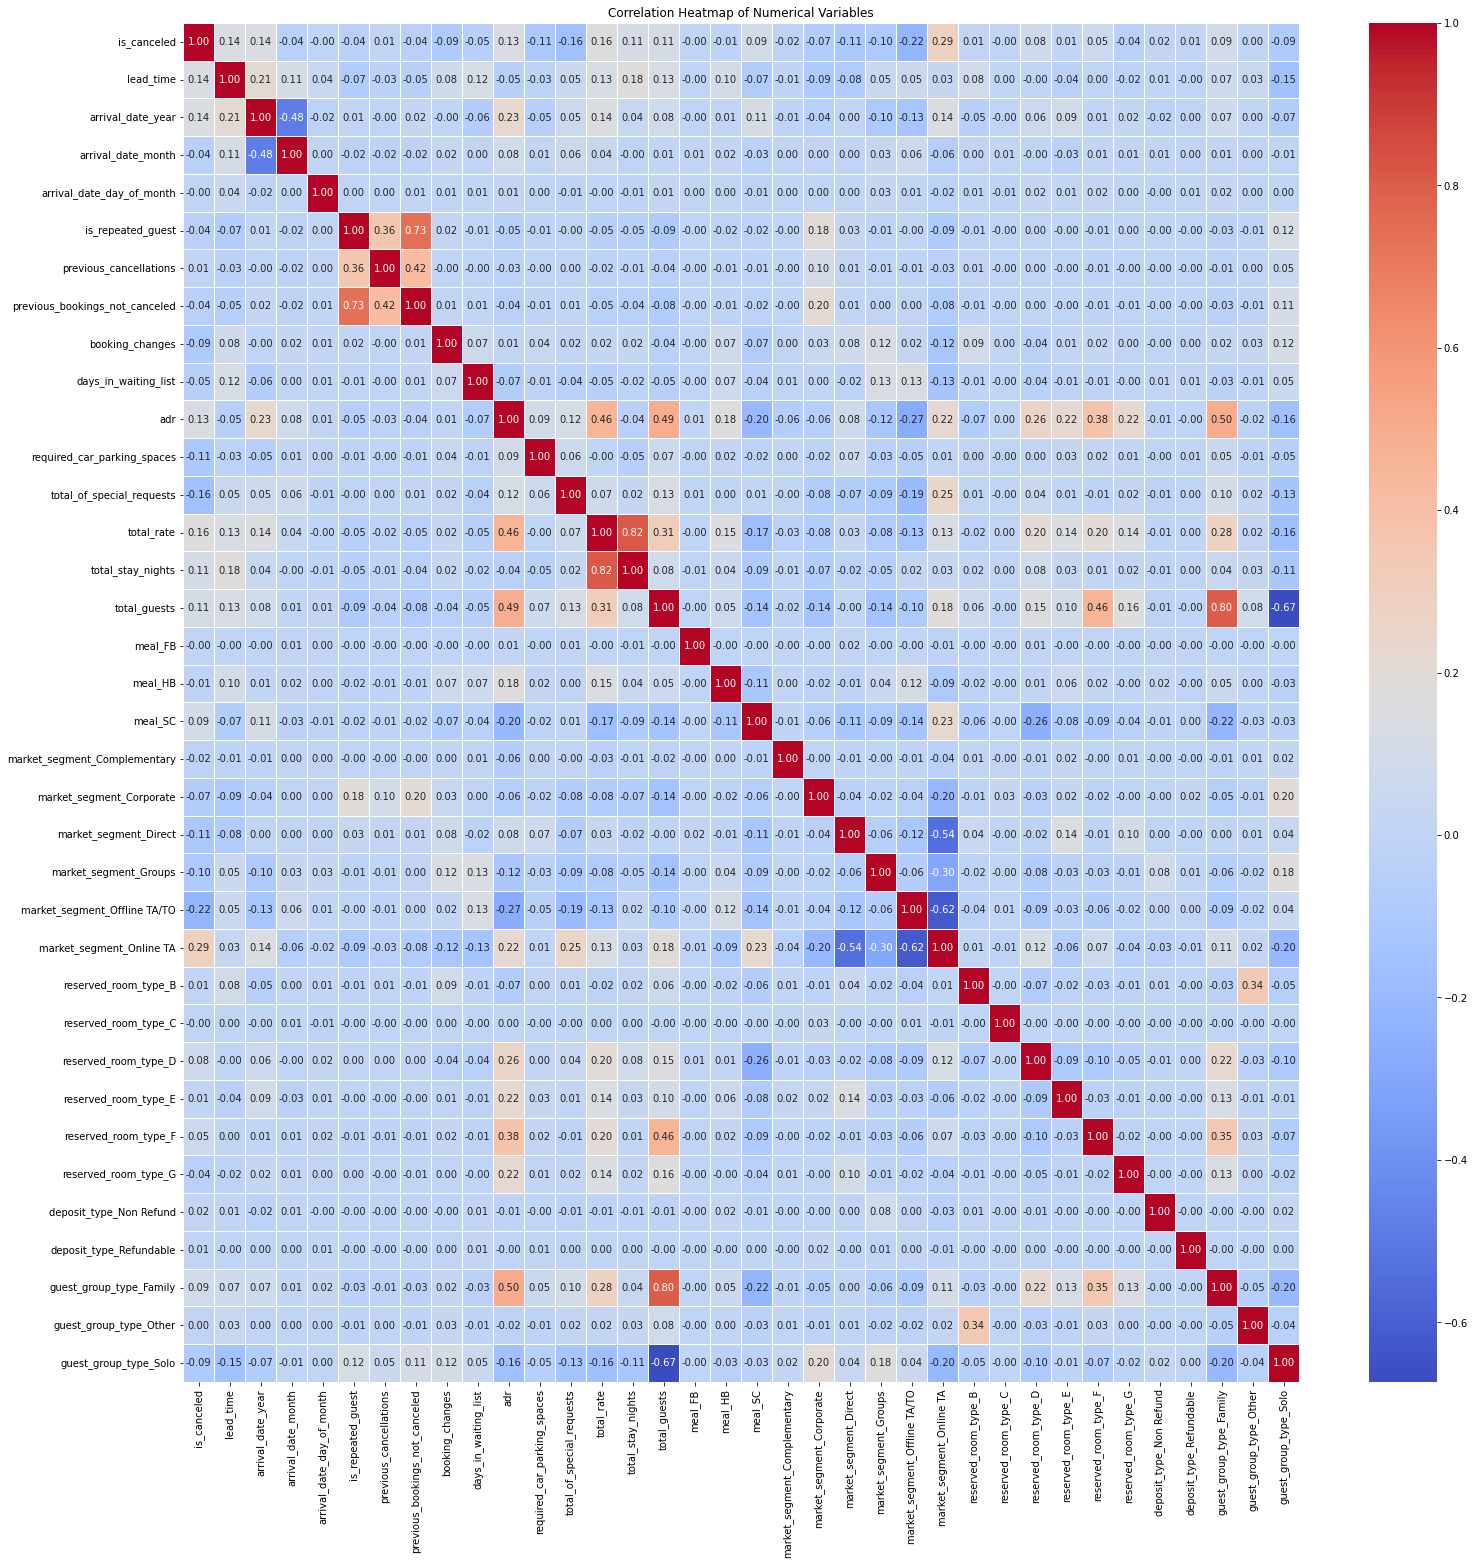

In [38]:
hotel_data_encoded_ordinal_corr = hotel_data_encoded_ordinal.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(hotel_data_encoded_ordinal_corr, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Data Split

In [39]:
X = hotel_data_encoded_ordinal.drop(columns='is_canceled')
y = hotel_data_encoded_ordinal['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Model Development

### A. Model Selection:

We'll select a few classification models suitable for predicting binary outcomes (i.e., whether a booking will be canceled or not). Some common choices might include:

- Logistic Regression
- Decision Trees
- Random Forest
- Gradient Boosting (XGBoost)

### B. Model Training:
We'll train the selected models using the training data (X_train and y_train).

### C. Hyperparameter Tuning:
We'll optimize the hyperparameters of the selected models to enhance their predictive performance.

# Logistic Regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
Va

Train Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     23228
           1       0.65      0.42      0.51      8924

    accuracy                           0.78     32152
   macro avg       0.72      0.67      0.68     32152
weighted avg       0.76      0.78      0.76     32152

Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      5807
           1       0.64      0.44      0.52      2231

    accuracy                           0.78      8038
   macro avg       0.72      0.67      0.69      8038
weighted avg       0.76      0.78      0.76      8038

Test Confusion Matrix:
[[5260  547]
 [1257  974]]


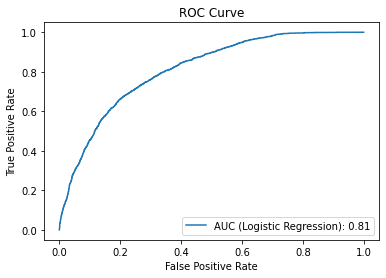

In [40]:

logreg = LogisticRegression(random_state=42)

param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2']}


grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=KFold(n_splits=5), scoring='accuracy')


grid_logreg.fit(X_train, y_train)

y_pred_logreg_train = grid_logreg.predict(X_train)
y_pred_logreg_test = grid_logreg.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_logreg_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test))

y_prob_logreg = grid_logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f'AUC (Logistic Regression): {roc_auc_score(y_test, y_prob_logreg):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Decision Trees

Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     23228
           1       0.67      0.54      0.60      8924

    accuracy                           0.80     32152
   macro avg       0.75      0.72      0.73     32152
weighted avg       0.79      0.80      0.79     32152

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5807
           1       0.65      0.54      0.59      2231

    accuracy                           0.79      8038
   macro avg       0.74      0.72      0.73      8038
weighted avg       0.78      0.79      0.79      8038

Test Confusion Matrix:
[[5150  657]
 [1016 1215]]


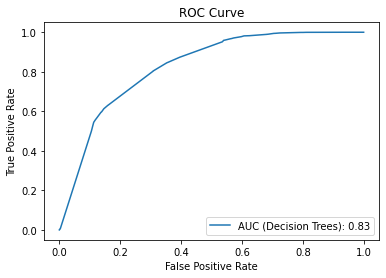

In [41]:

dtree = DecisionTreeClassifier(random_state=42)


param_grid_dtree = {'max_depth': [3, 5, 7, 9],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]}


grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=KFold(n_splits=5), scoring='accuracy')


grid_dtree.fit(X_train, y_train)


y_pred_dtree_train = grid_dtree.predict(X_train)
y_pred_dtree_test = grid_dtree.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_dtree_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_dtree_test))


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree_test))

y_prob_dtree = grid_dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dtree)
plt.plot(fpr, tpr, label=f'AUC (Decision Trees): {roc_auc_score(y_test, y_prob_dtree):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Forest

Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     23228
           1       0.75      0.27      0.40      8924

    accuracy                           0.77     32152
   macro avg       0.76      0.62      0.63     32152
weighted avg       0.77      0.77      0.73     32152

Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      5807
           1       0.73      0.28      0.41      2231

    accuracy                           0.77      8038
   macro avg       0.75      0.62      0.63      8038
weighted avg       0.76      0.77      0.73      8038

Test Confusion Matrix:
[[5576  231]
 [1601  630]]


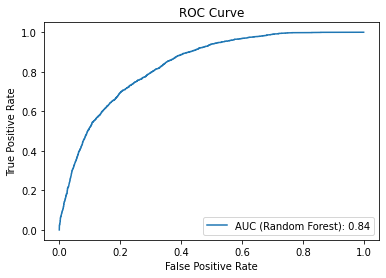

In [42]:

rf = RandomForestClassifier(random_state=42)


param_grid_rf = {'n_estimators': [100, 200],
                 'max_depth': [3, 5, 7],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}


grid_rf = GridSearchCV(rf, param_grid_rf, cv=KFold(n_splits=5), scoring='accuracy')


grid_rf.fit(X_train, y_train)


y_pred_rf_train = grid_rf.predict(X_train)
y_pred_rf_test = grid_rf.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_rf_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_rf_test))


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_test))

y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'AUC (Random Forest): {roc_auc_score(y_test, y_prob_rf):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Xgboost

Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     23228
           1       0.78      0.66      0.72      8924

    accuracy                           0.85     32152
   macro avg       0.83      0.79      0.81     32152
weighted avg       0.85      0.85      0.85     32152

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5807
           1       0.70      0.59      0.64      2231

    accuracy                           0.81      8038
   macro avg       0.77      0.75      0.76      8038
weighted avg       0.81      0.81      0.81      8038

Test Confusion Matrix:
[[5231  576]
 [ 914 1317]]


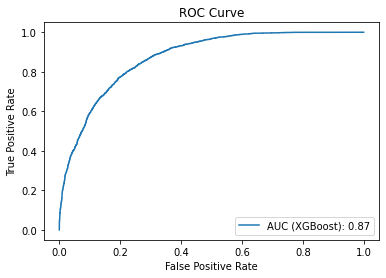

In [43]:

xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}


grid_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=KFold(n_splits=5), scoring='accuracy')

grid_xgboost.fit(X_train, y_train)


y_pred_xgboost_train = grid_xgboost.predict(X_train)
y_pred_xgboost_test = grid_xgboost.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_xgboost_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_xgboost_test))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost_test))

y_prob_xgboost = grid_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgboost)
plt.plot(fpr, tpr, label=f'AUC (XGBoost): {roc_auc_score(y_test, y_prob_xgboost):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 8. Model Evaluation


To evaluate which model is the best for predicting cancellations, we'll consider multiple criteria:

- **Accuracy**: This represents the overall proportion of correct predictions. However, accuracy can sometimes be misleading in imbalanced datasets.

- **Precision, Recall, and F1-score**: These provide a more detailed view of the model's performance on both the positive (cancellation) and negative (no cancellation) classes.
    - **Precision** refers to the percentage of positive identifications (predictions) which were actually correct. It's the ratio of correctly predicted positive observations to the total predicted positives.
    - **Recall (or Sensitivity)** refers to the percentage of actual positives which were correctly classified.
    - **F1-score** is the harmonic mean of precision and recall. It's useful when the class distribution is imbalanced.
    
- **Area Under the Curve (AUC)**: This represents the model's ability to distinguish between the classes. A higher AUC indicates better performance.

- **Overfitting**: A model that performs exceptionally well on the training set but poorly on the test set may be overfitting. We'd like a model that performs similarly on both the training and test sets.

- **Confusion Matrix**: This provides a breakdown of the true positives, false positives, true negatives, and false negatives. It's especially useful when the costs of false positives and false negatives are different.



| Metric/Model        | Logistic Regression | Decision Trees | Random Forest | XGBoost |
|---------------------|---------------------|----------------|---------------|---------|
| **Accuracy**        | 0.78                | 0.79           | 0.77          | 0.81    |
| **Precision (1)**   | 0.64                | 0.65           | 0.73          | 0.70    |
| **Recall (1)**      | 0.44                | 0.54           | 0.28          | 0.59    |
| **F1-score (1)**    | 0.52                | 0.59           | 0.41          | 0.64    |
| **AUC**             | 0.81                | 0.83           | 0.84          | 0.87    |
| **False Negatives** | 1257                | 1016           | 1601          | 914     |
| **False Positives** | 547                 | 657            | 231           | 576     |


**Overfitting Check**:

- The biggest discrepancy between training and testing performance is seen in Random Forest, especially with respect to recall for class 1. This might indicate some overfitting.
- XGBoost has the highest training accuracy and F1-score, but its test results are also strong, indicating that it's likely not overfitting as much as the Random Forest.

**Confusion Matrix**:

- The confusion matrices provide a clearer picture of where the models are making mistakes. For instance, Random Forest has a high number of false negatives (1601) compared to XGBoost (914).


**Conclusion**:

- Given all these metrics and the business context of hotel booking cancellations, the XGBoost model seems to be the best choice. It has the highest accuracy, F1-score for class 1 (cancellations), and AUC. Moreover, its performance on the test set is robust, indicating that it generalizes well to new data.

## 9. Feature Importances

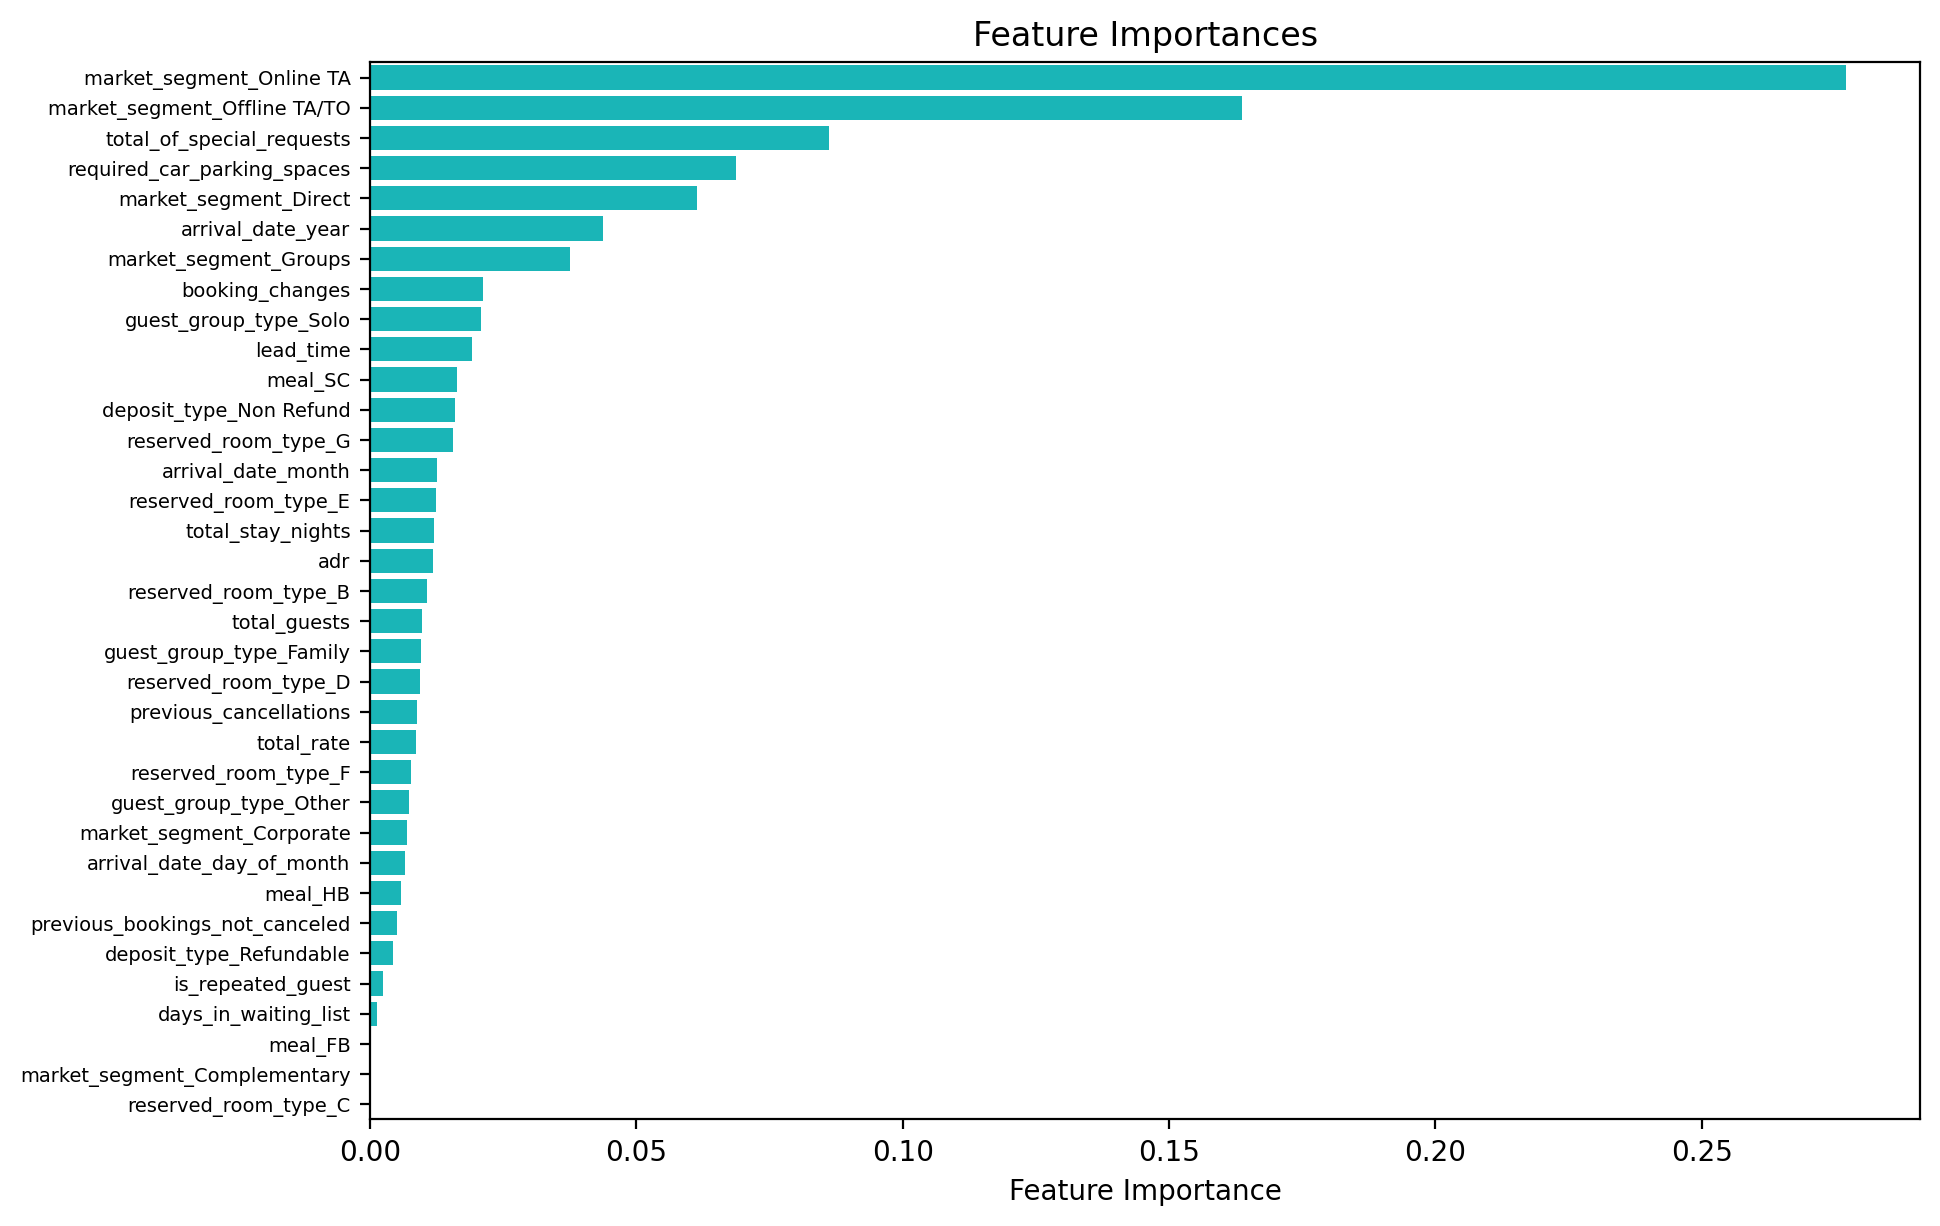

In [50]:

best_xgboost_model = grid_xgboost.best_estimator_


feature_importances = best_xgboost_model.feature_importances_


sorted_indices = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()


**Observations:**

- Market segments are highly influential in predicting cancellations, with online and offline travel agents, as well as direct bookings, being the top contributors.

- Guest preferences and requirements, such as special requests and parking spaces, also play a significant role.

- Some features like certain meal types and room types have little to no influence on the prediction, suggesting that they might not be relevant for this prediction task.

## 10. Conclusion

Market segmentation is the primary feature we need to closely monitor when predicting cancellations. However, we still lack information that determines precisely why foreign guests cancel their bookings. We need to investigate in-depth the specific factors motivating cancellations via Online Travel Agencies like Booking.com. Additionally, we should explore each OTA's website, check our hotel's page, and analyze the features and reviews there to gain a better understanding of potential guest booking behaviors.

In [54]:
# import pickle

# # Save the model
# with open('xgboost_model.pkl', 'wb') as model_file:
#     pickle.dump(best_xgboost_model, model_file)

In [47]:
# hotel_data_encoded_ordinal['customer_type_Transient-Party'].value_counts()

In [48]:
# dummy_data = {}

# # Iterate over each column in the DataFrame
# for column in hotel_data_encoded_ordinal.columns:
#     # Find the mode of the column. `.mode()` returns a DataFrame so we select the first element with `.iloc[0]`
#     mode_value = hotel_data_encoded_ordinal[column].mode().iloc[0]
#     # Assign the mode value to the corresponding column name in the dictionary
#     dummy_data[column] = mode_value

In [49]:
# dummy_data